In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Pubg_data.csv',nrows = 10000)

In [3]:
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,c4402a9036ed91,2cac6d40184c41,d5c6859c1f0490,0,0,0.00,0,0,0,89,...,0,0.0000,0,0.00,0,0,0.00,0,0,0.0000
9996,7b0f5d94f674d4,19d52ad6b8d29f,619b8cf677706c,1,2,580.50,4,0,4,1,...,0,2873.0000,0,0.00,0,0,3641.00,5,0,0.9773
9997,bd6a4922267820,cc4f8aa5140757,0a4a584a6c869d,0,1,100.00,1,0,0,27,...,1,677.4000,0,164.20,0,0,2238.00,5,0,0.5000
9998,1bb51b115d2d28,f705ad968929e7,982117d62ea68d,0,2,125.80,0,0,0,29,...,0,0.0000,0,0.00,0,0,1001.00,4,0,0.6522


In [4]:
data.isna().sum().sum()

0

In [5]:
pd.set_option('max_columns',None)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               10000 non-null  object 
 1   groupId          10000 non-null  object 
 2   matchId          10000 non-null  object 
 3   assists          10000 non-null  int64  
 4   boosts           10000 non-null  int64  
 5   damageDealt      10000 non-null  float64
 6   DBNOs            10000 non-null  int64  
 7   headshotKills    10000 non-null  int64  
 8   heals            10000 non-null  int64  
 9   killPlace        10000 non-null  int64  
 10  killPoints       10000 non-null  int64  
 11  kills            10000 non-null  int64  
 12  killStreaks      10000 non-null  int64  
 13  longestKill      10000 non-null  float64
 14  matchDuration    10000 non-null  int64  
 15  matchType        10000 non-null  object 
 16  maxPlace         10000 non-null  int64  
 17  numGroups    

In [7]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [8]:
import matplotlib.pyplot as plt
import seaborn as sn

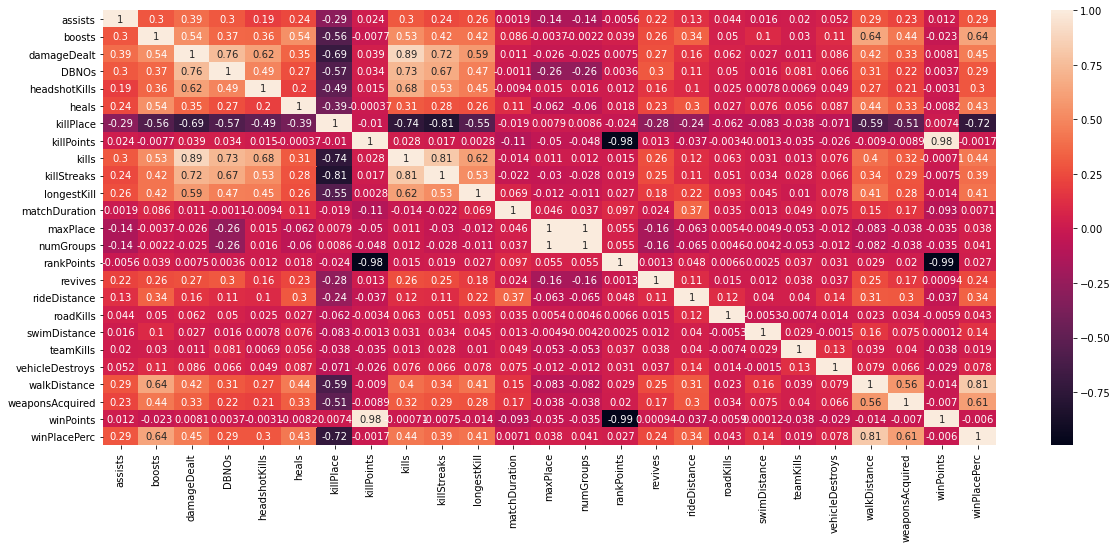

In [9]:
plt.figure(figsize = (20,8))
sn.heatmap(data.corr(),annot = True)

In [78]:
def preprocessing_inputs(df,target = 'winPoints'):
    df = df.copy()
    # drop big unique value
    df = df.drop(['Id','groupId','matchId','walkDistance','killPoints','damageDealt'],axis = 'columns')
    df = pd.get_dummies(df,drop_first = True)
    # remove unneed columns 
  
    # split data X,y
    if target == 'winPoints':
        df =df.drop(['winPlacePerc'],axis = 'columns')
        y = df['winPoints']
        X = df.drop(['winPoints'],axis = 'columns')
    elif target =='winPlacePerc':
        df =df.drop(['winPoints'],axis = 'columns')
        y = df['winPlacePerc']
        X = df.drop(['winPlacePerc'],axis = 'columns')
    # train_test_split
    X_train,X_test,y_train,y_test   = train_test_split(X,y,test_size = 0.2,shuffle = True,random_state =2)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train =pd.DataFrame(scaler.transform(X_train),index = X_train.index,columns = X_train.columns) 
    X_test  =pd.DataFrame(scaler.transform(X_test),index = X_test.index,columns = X_test.columns)
    
    return X_train,X_test,y_train,y_test

In [98]:
X_train,X_test,y_train,y_test= preprocessing_inputs(data,target = 'winPoints')

In [99]:
X_train.head()

,assists,boosts,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,weaponsAcquired,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
8856,-0.403188,1.055097,0.296998,-0.393688,0.220680,-0.893969,0.689568,0.625610,-0.344884,-0.746501,-0.777246,-0.775614,-1.211740,-0.349763,-0.411814,-0.052696,5.541507,5.406295,-0.090507,0.134621,0.0,-0.277499,-0.539395,-0.019369,-0.011181,-0.011181,-0.03356,-0.011181,-0.011181,-0.047488,-0.196701,-0.372328,2.451814,-0.809498
1545,-0.403188,-0.647702,0.296998,-0.393688,-0.518926,-0.748146,0.044132,0.625610,-0.414123,-0.863471,-0.692860,-0.646052,-1.211740,-0.349763,-0.411814,-0.052696,-0.148978,-0.147880,-0.090507,0.134621,0.0,-0.277499,-0.539395,-0.019369,-0.011181,-0.011181,-0.03356,-0.011181,-0.011181,-0.047488,-0.196701,-0.372328,-0.407861,1.235334
8136,-0.403188,-0.647702,-0.582995,-0.393688,-0.149123,0.053882,-0.601305,-0.759249,-0.454787,0.855994,-0.692860,-0.732427,-1.211740,-0.349763,1.291049,-0.052696,-0.148978,-0.147880,-0.090507,-0.694456,0.0,-0.277499,-0.539395,-0.019369,-0.011181,-0.011181,-0.03356,-0.011181,-0.011181,-0.047488,-0.196701,-0.372328,-0.407861,1.235334
7768,1.358421,2.190296,2.056983,-0.393688,0.960286,-0.966880,0.044132,0.625610,-0.014281,-0.843976,-0.692860,-0.689239,0.965563,-0.349763,-0.411814,-0.052696,-0.107956,-0.147880,-0.090507,1.378238,0.0,-0.277499,-0.539395,-0.019369,-0.011181,-0.011181,-0.03356,-0.011181,-0.011181,-0.047488,-0.196701,-0.372328,2.451814,-0.809498
7782,-0.403188,2.757895,-0.582995,-0.393688,1.330089,-1.294982,0.689568,0.625610,-0.338597,0.898883,2.218471,2.161132,0.871901,-0.349763,0.323422,17.512802,-0.148978,-0.147880,-0.090507,0.134621,0.0,-0.277499,-0.539395,-0.019369,-0.011181,-0.011181,-0.03356,-0.011181,-0.011181,-0.047488,-0.196701,2.685806,-0.407861,-0.809498


In [100]:
X_test

,assists,boosts,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,weaponsAcquired,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
7878,-0.403188,1.055097,1.176990,3.037143,0.960286,-1.550173,1.980442,2.010468,1.065079,-0.496964,0.108811,-0.127802,-1.211740,-0.349763,0.469000,-0.052696,-0.148978,-0.147880,-0.090507,0.549160,0.0,3.603611,-0.539395,-0.019369,-0.011181,-0.011181,-0.03356,-0.011181,-0.011181,-0.047488,-0.196701,-0.372328,-0.407861,-0.809498
3224,-0.403188,-0.647702,0.296998,-0.393688,-0.518926,0.053882,-0.601305,-0.759249,-0.454787,-0.781592,-0.735053,-0.732427,0.829821,1.789462,-0.411814,-0.052696,2.728744,5.406295,-0.090507,-0.694456,0.0,-0.277499,-0.539395,-0.019369,-0.011181,-0.011181,-0.03356,-0.011181,-0.011181,-0.047488,-0.196701,-0.372328,-0.407861,1.235334
1919,-0.403188,-0.080102,2.056983,3.037143,-0.518926,-1.477261,1.335005,2.010468,3.376315,0.832600,-0.735053,-0.689239,1.356501,-0.349763,4.696775,-0.052696,-0.148978,-0.147880,-0.090507,0.549160,0.0,-0.277499,-0.539395,-0.019369,-0.011181,-0.011181,-0.03356,-0.011181,-0.011181,-0.047488,-0.196701,-0.372328,-0.407861,1.235334
4432,-0.403188,2.190296,0.296998,-0.393688,0.590483,-0.784601,0.044132,0.625610,1.489360,-1.148099,-0.777246,-0.775614,0.703581,-0.349763,-0.411814,-0.052696,-0.148978,-0.147880,-0.090507,0.549160,0.0,-0.277499,-0.539395,-0.019369,-0.011181,-0.011181,-0.03356,-0.011181,-0.011181,-0.047488,-0.196701,-0.372328,-0.407861,1.235334
4835,-0.403188,1.055097,-0.582995,3.037143,0.590483,-1.513717,1.335005,0.625610,1.085563,0.649346,1.838732,1.858820,0.881403,-0.349763,-0.411814,-0.052696,-0.148978,-0.147880,-0.090507,0.963699,0.0,-0.277499,-0.539395,-0.019369,-0.011181,-0.011181,-0.03356,-0.011181,-0.011181,-0.047488,-0.196701,2.685806,-0.407861,-0.809498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9073,-0.403188,-0.647702,-0.582995,-0.393688,-0.518926,1.512113,-0.601305,-0.759249,-0.454787,-1.038927,-0.692860,-0.689239,-1.211740,-0.349763,-0.411814,-0.052696,-0.148978,-0.147880,-0.090507,-1.108995,0.0,-0.277499,-0.539395,-0.019369,-0.011181,-0.011181,-0.03356,-0.011181,-0.011181,-0.047488,-0.196701,-0.372328,2.451814,-0.809498
8584,-0.403188,-0.647702,-0.582995,-0.393688,-0.518926,1.111099,-0.601305,-0.759249,-0.454787,2.384407,0.235391,0.217697,0.733444,-0.349763,-0.411814,-0.052696,-0.148978,-0.147880,-0.090507,-1.108995,0.0,3.603611,-0.539395,-0.019369,-0.011181,-0.011181,-0.03356,-0.011181,-0.011181,-0.047488,-0.196701,-0.372328,-0.407861,-0.809498
5390,-0.403188,-0.647702,-0.582995,-0.393688,-0.518926,1.475657,-0.601305,-0.759249,-0.454787,-0.695814,-0.608473,-0.559677,0.737517,-0.349763,-0.411814,-0.052696,-0.148978,-0.147880,-0.090507,-1.523533,0.0,-0.277499,-0.539395,-0.019369,-0.011181,-0.011181,-0.03356,-0.011181,-0.011181,-0.047488,-0.196701,-0.372328,-0.407861,1.235334
5092,-0.403188,-0.647702,-0.582995,-0.393688,-0.518926,1.767303,-0.601305,-0.759249,-0.454787,1.304380,-0.650667,-0.689239,-1.211740,-0.349763,-0.411814,-0.052696,-0.148978,-0.147880,-0.090507,-0.694456,0.0,-0.277499,-0.539395,-0.019369,-0.011181,-0.011181,-0.03356,-0.011181,-0.011181,-0.047488,-0.196701,-0.372328,-0.407861,1.235334


In [101]:
y_train

8856    1489
1545    1583
8136    1500
7768       0
7782       0
        ... 
1099       0
2514       0
6637       0
2575       0
7336       0
Name: winPoints, Length: 8000, dtype: int64

In [102]:
y_test

7878    1511
3224       0
1919       0
4432       0
4835       0
        ... 
9073    1500
8584       0
5390       0
5092    1466
2964       0
Name: winPoints, Length: 2000, dtype: int64

In [103]:
X_train.describe()

,assists,boosts,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,weaponsAcquired,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
count,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8000.0,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03
mean,7.510659e-16,9.370282e-17,-2.215728e-16,-1.125489e-17,-5.656309e-16,6.762646e-17,1.918864e-16,-4.686113e-16,7.010365e-16,-1.392914e-16,-8.230916e-17,2.816497e-16,6.494805e-18,-6.811912e-16,-9.353629e-17,-7.255741e-16,8.677954e-17,3.672548e-16,-2.278202e-15,7.407963e-17,0.0,1.110223e-18,-1.592476e-15,-6.576996e-16,-7.625328e-16,-1.005895e-15,-1.152274e-15,-8.799944e-16,-7.625328e-16,6.810507e-16,2.838771e-16,1.020711e-16,4.263256e-16,1.737499e-16
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,0.0,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-4.031882e-01,-6.477020e-01,-5.829952e-01,-3.936878e-01,-5.189260e-01,-1.695996e+00,-6.013050e-01,-7.592486e-01,-4.547871e-01,-4.665009e+00,-1.663303e+00,-1.812113e+00,-1.211740e+00,-3.497634e-01,-4.118141e-01,-5.269650e-02,-1.489780e-01,-1.478799e-01,-9.050722e-02,-1.523533e+00,0.0,-2.774994e-01,-5.393952e-01,-1.936855e-02,-1.118104e-02,-1.118104e-02,-3.355990e-02,-1.118104e-02,-1.118104e-02,-4.748762e-02,-1.967009e-01,-3.723277e-01,-4.078612e-01,-8.094977e-01
25%,-4.031882e-01,-6.477020e-01,-5.829952e-01,-3.936878e-01,-5.189260e-01,-8.575129e-01,-6.013050e-01,-7.592486e-01,-4.547871e-01,-8.283800e-01,-6.928598e-01,-6.892392e-01,-1.211740e+00,-3.497634e-01,-4.118141e-01,-5.269650e-02,-1.489780e-01,-1.478799e-01,-9.050722e-02,-6.944560e-01,0.0,-2.774994e-01,-5.393952e-01,-1.936855e-02,-1.118104e-02,-1.118104e-02,-3.355990e-02,-1.118104e-02,-1.118104e-02,-4.748762e-02,-1.967009e-01,-3.723277e-01,-4.078612e-01,-8.094977e-01
50%,-4.031882e-01,-6.477020e-01,-5.829952e-01,-3.936878e-01,-5.189260e-01,1.742586e-02,-6.013050e-01,-7.592486e-01,-4.547871e-01,-5.437520e-01,-6.084734e-01,-5.596769e-01,7.510909e-01,-3.497634e-01,-4.118141e-01,-5.269650e-02,-1.489780e-01,-1.478799e-01,-9.050722e-02,-2.799173e-01,0.0,-2.774994e-01,-5.393952e-01,-1.936855e-02,-1.118104e-02,-1.118104e-02,-3.355990e-02,-1.118104e-02,-1.118104e-02,-4.748762e-02,-1.967009e-01,-3.723277e-01,-4.078612e-01,-8.094977e-01
75%,-4.031882e-01,4.874971e-01,2.969975e-01,-3.936878e-01,2.206799e-01,8.559089e-01,4.413174e-02,6.256098e-01,-3.233152e-02,1.054843e+00,1.931974e-01,1.745097e-01,8.257490e-01,-3.497634e-01,-3.689069e-01,-5.269650e-02,-1.489780e-01,-1.478799e-01,-9.050722e-02,5.491602e-01,0.0,-2.774994e-01,-5.393952e-01,-1.936855e-02,-1.118104e-02,-1.118104e-02,-3.355990e-02,-1.118104e-02,-1.118104e-02,-4.748762e-02,-1.967009e-01,-3.723277e-01,-4.078612e-01,1.235334e+00
max,1.016646e+01,6.731092e+00,1.085691e+01,9.898805e+00,1.020536e+01,1.913127e+00,1.037112e+01,6.165043e+00,8.716332e+00,2.485781e+00,2.345051e+00,2.463444e+00,2.040641e+00,1.248559e+01,1.108084e+01,3.507830e+01,2.480860e+01,1.651464e+01,1.104884e+01,1.630163e+01,0.0,3.603611e+00,1.853928e+00,5.163009e+01,

In [104]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier



from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
models = {
   #'Logistic_Rgression'        : LogisticRegression(),
    'SVC'                       : SVC(),
    'Linear_Svc'                : LinearSVC(),
  # 'Decision_tree'             : DecisionTreeClassifier(),
    'Random_forest'             : RandomForestClassifier(),
   # 'Gradient_Boosting'         : GradientBoostingClassifier(),
   # 'GNB'                       : GaussianNB(),
   # 'K_Neighbors'               : KNeighborsClassifier(),
   # 'Neural_Network'            : MLPClassifier()
}
for name,model in models.items():
    model.fit(X_train,y_train)
    print(name + ' Trainned')
    

SVC Trainned


In [ ]:
for name,model in models.items():
    print(name + 'Accuracy : {:.2f}'.format(model.score(X_test,y_test)))
    

In [ ]:
for name, model in models.items():
    print(name + " R^2 Score: {:.2f}".format(model.score(X_test, y_test)))